<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [4]:
#Corroboramos valores nulos
valores_nulos=Mexico.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       768
neighborhood_overview                           12431
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                                3373
Length: 71, dtype: int64

In [5]:
#Calculamos el numero total de la población "n"
Mexico['availability_365']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
26401 non-null  int64
dtypes: int64(1)
memory usage: 206.4 KB


In [6]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Mexico['availability_365'].max()
Min=Mexico['availability_365'].min()
Limites= [Min, Max]
Limites

[0, 365]

In [7]:
#Calculamos el rango R
R=Max-Min
R

365

In [8]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [9]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

23.27838835117603

**Creación de Categorias a partir de clases**

In [10]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 365.1, 16)
intervalos

array([-1.00000000e-01,  2.42466667e+01,  4.85933333e+01,  7.29400000e+01,
        9.72866667e+01,  1.21633333e+02,  1.45980000e+02,  1.70326667e+02,
        1.94673333e+02,  2.19020000e+02,  2.43366667e+02,  2.67713333e+02,
        2.92060000e+02,  3.16406667e+02,  3.40753333e+02,  3.65100000e+02])

In [11]:
#Creamos las categorías 
categorias= ["Categoría1 (0-2.4 availability_365)", "Categoría2 (2.5-4.8 availability_365)","Categoría3 (4.9-7.2 availability_365)", "Categoría4 (7.3-9.7 availability_365)",
             "Categoría5 (9.8-1.21 availability_365)", "Categoría6 (1.22-1.45 availability_365)","Categoría7 (1.46-1.7 availability_365)", "Categoría8 (1.71-1.94 availability_365)", "Categoría9 (1.95-2.19 availability_365)", "Categoría10 (2.20-2.43 availability_365)","Categoría11 (2.44-2.67 availability_365)", "Categoría12 (2.68-2.92 availability_365)",
             "Categoría13 (2.93-3.16 availability_365)", "Categoría14 (3.17-3.40 availability_365)","Categoría15 (3.41-3.66 availability_365)"
             ]

In [12]:
#Finalmente creamos las categorías en la columna numérica
Mexico['availability_365']=pd.cut(x= Mexico['availability_365'], bins=intervalos, labels= categorias)
Mexico['availability_365']

0        Categoría15 (3.41-3.66 availability_365)
1        Categoría15 (3.41-3.66 availability_365)
2        Categoría14 (3.17-3.40 availability_365)
3        Categoría11 (2.44-2.67 availability_365)
4         Categoría9 (1.95-2.19 availability_365)
                           ...                   
26396    Categoría15 (3.41-3.66 availability_365)
26397    Categoría15 (3.41-3.66 availability_365)
26398    Categoría15 (3.41-3.66 availability_365)
26399    Categoría15 (3.41-3.66 availability_365)
26400    Categoría12 (2.68-2.92 availability_365)
Name: availability_365, Length: 26401, dtype: category
Categories (15, object): ['Categoría1 (0-2.4 availability_365)' < 'Categoría2 (2.5-4.8 availability_365)' < 'Categoría3 (4.9-7.2 availability_365)' < 'Categoría4 (7.3-9.7 availability_365)' ... 'Categoría12 (2.68-2.92 availability_365)' < 'Categoría13 (2.93-3.16 availability_365)' < 'Categoría14 (3.17-3.40 availability_365)' < 'Categoría15 (3.41-3.66 availability_365)']

In [13]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['availability_365'].value_counts().reset_index()
Tabla_freq

availability_365  count
0   Categoría15 (3.41-3.66 availability_365)   7592
1   Categoría14 (3.17-3.40 availability_365)   2792
2        Categoría1 (0-2.4 availability_365)   2767
3   Categoría12 (2.68-2.92 availability_365)   1749
4   Categoría11 (2.44-2.67 availability_365)   1652
5   Categoría13 (2.93-3.16 availability_365)   1562
6    Categoría8 (1.71-1.94 availability_365)   1555
7      Categoría4 (7.3-9.7 availability_365)   1549
8   Categoría10 (2.20-2.43 availability_365)   1019
9     Categoría7 (1.46-1.7 availability_365)    959
10   Categoría9 (1.95-2.19 availability_365)    783
11     Categoría3 (4.9-7.2 availability_365)    774
12   Categoría6 (1.22-1.45 availability_365)    608
13     Categoría2 (2.5-4.8 availability_365)    543
14    Categoría5 (9.8-1.21 availability_365)    497

In [14]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

availability_365  count
0   Categoría15 (3.41-3.66 availability_365)   7592
1   Categoría14 (3.17-3.40 availability_365)   2792
2        Categoría1 (0-2.4 availability_365)   2767
3   Categoría12 (2.68-2.92 availability_365)   1749
4   Categoría11 (2.44-2.67 availability_365)   1652
5   Categoría13 (2.93-3.16 availability_365)   1562
6    Categoría8 (1.71-1.94 availability_365)   1555
7      Categoría4 (7.3-9.7 availability_365)   1549
8   Categoría10 (2.20-2.43 availability_365)   1019
9     Categoría7 (1.46-1.7 availability_365)    959
10   Categoría9 (1.95-2.19 availability_365)    783
11     Categoría3 (4.9-7.2 availability_365)    774
12   Categoría6 (1.22-1.45 availability_365)    608
13     Categoría2 (2.5-4.8 availability_365)    543
14    Categoría5 (9.8-1.21 availability_365)    497

In [15]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('availability_365')
Filtro_index

count
availability_365                               
Categoría15 (3.41-3.66 availability_365)   7592
Categoría14 (3.17-3.40 availability_365)   2792
Categoría1 (0-2.4 availability_365)        2767
Categoría12 (2.68-2.92 availability_365)   1749
Categoría11 (2.44-2.67 availability_365)   1652
Categoría13 (2.93-3.16 availability_365)   1562
Categoría8 (1.71-1.94 availability_365)    1555
Categoría4 (7.3-9.7 availability_365)      1549
Categoría10 (2.20-2.43 availability_365)   1019
Categoría7 (1.46-1.7 availability_365)      959
Categoría9 (1.95-2.19 availability_365)     783
Categoría3 (4.9-7.2 availability_365)       774
Categoría6 (1.22-1.45 availability_365)     608
Categoría2 (2.5-4.8 availability_365)       543
Categoría5 (9.8-1.21 availability_365)      497

Text(0, 0.5, 'Frecuencia')

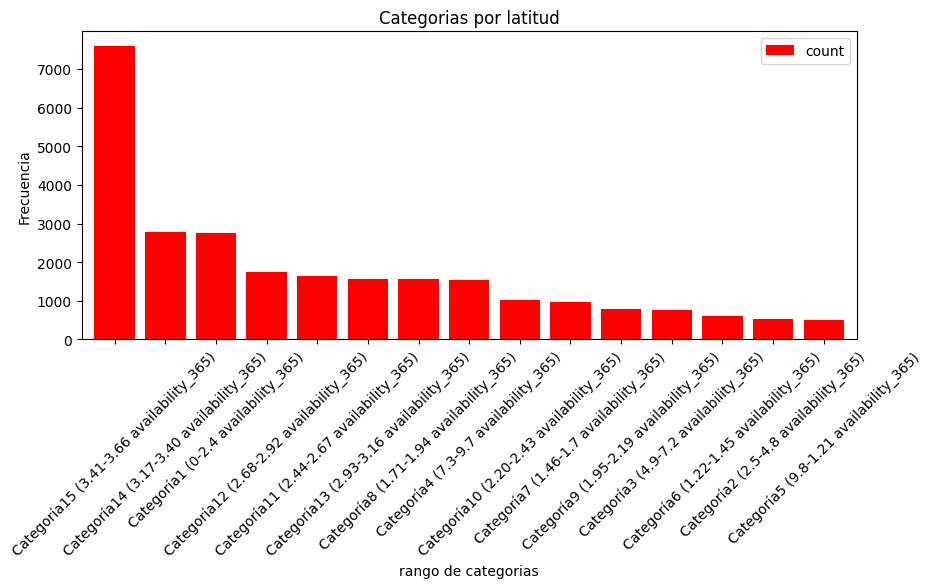

In [16]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')